# KNN

* [Tutorail for clustering](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)
* [tutorial for regression](https://medium.com/where-quant-meets-data-science/building-k-nearest-neighbour-algorithm-from-scratch-bd0c5df13192)

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. CLUSTERING

### implémentation 

In [144]:
def euclidean_distance(row1, row2):
	distance = np.sqrt(np.sum((row1-row2)**2))
	return distance

In [145]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	index = 0
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((index, train_row, dist))
		index +=1
	distances.sort(key=lambda tup: tup[2])
	neighbors_index = list()
	for i in range(num_neighbors):
		neighbors_index.append(distances[i][0])
	return neighbors_index

In [152]:
def plot_new_point(data, new_point, neighbors_index):
    plt.scatter(np.delete(X[:, 0], neighbors_index), np.delete(X[:, 1], neighbors_index), c= 'blue', label='0')
    plt.scatter(X[:, 0][neighbors_index], X[:, 1][neighbors_index], c= 'red', label='1')
    plt.scatter(new_point[0], new_point[1], c= 'black', label='new')
    plt.legend()
    

### Test avec dimension = 2 

In [147]:
X1 = np.array([0, 1, 2, 8, 9, 15])
X2 = np.array([1, 3, 0.5, 12, 8, 11])
X = np.array([X1, X2]).T

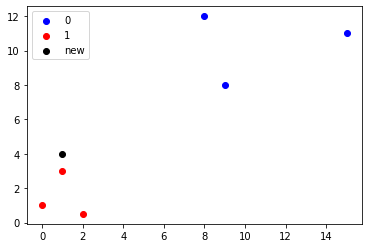

In [148]:
X = np.array([X1, X2]).T
new_point = np.array([1, 4])
neighbors_index = get_neighbors(train=X, test_row=new_point, num_neighbors=3)
plot_new_point(data=X, new_point=new_point, neighbors_index=neighbors_index)

### Test avec dimension > 2

In [193]:
def plot_new_point(data, new_point, neighbors_index):
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c= 'blue', label='0')
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c= 'red', label='1')
    plt.scatter(X[:, 0][neighbors_index], X[:, 1][neighbors_index], c= 'green', label='neighbors')
    plt.scatter(new_point[0], new_point[1], c= 'yellow', label='new')
    plt.legend()

In [185]:
X[:, 0].shape

(150,)

In [186]:
from sklearn import datasets
iris = datasets.load_iris()

In [187]:
X = iris.data[:, :4]  # we only take the first two features.
y = iris.target

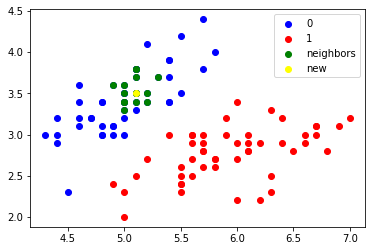

In [199]:
new_point = X[0, :]
neighbors_index = get_neighbors(train=X, test_row=new_point, num_neighbors=15)
plot_new_point(data=X, new_point=new_point, neighbors_index=neighbors_index)

## 2. REGRESSION

bonne implémentation -> https://medium.com/where-quant-meets-data-science/building-k-nearest-neighbour-algorithm-from-scratch-bd0c5df13192